In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
round(df.describe())

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.0
mean,204.0,39.0,546239.0,1136.0,1256.0,1101000.0,501214.0,25126.0,-26794.0,12.0,2.0,1.0,1.0,52762.0,7433.0,7400.0,37929.0,2005.0,NaN
std,115.0,9.0,257063.0,612.0,244.0,2297407.0,71702.0,27872.0,28104.0,7.0,1.0,1.0,1.0,26402.0,4881.0,4825.0,18886.0,6.0,NaN
min,0.0,19.0,100804.0,500.0,433.0,-1000000.0,430104.0,0.0,-111100.0,0.0,1.0,0.0,0.0,100.0,0.0,0.0,70.0,1995.0,NaN
25%,116.0,32.0,335980.0,500.0,1090.0,0.0,448404.0,0.0,-51500.0,6.0,1.0,0.0,1.0,41812.0,4295.0,4445.0,30292.0,2000.0,NaN
50%,200.0,38.0,533135.0,1000.0,1257.0,0.0,466446.0,0.0,-23250.0,12.0,1.0,1.0,1.0,58055.0,6775.0,6750.0,42100.0,2005.0,NaN
75%,276.0,44.0,759100.0,2000.0,1416.0,0.0,603251.0,51025.0,0.0,17.0,3.0,2.0,2.0,70592.0,11305.0,10885.0,50822.0,2010.0,NaN
max,479.0,64.0,999435.0,2000.0,2048.0,10000000.0,620962.0,100500.0,0.0,23.0,4.0,2.0,3.0,114920.0,21450.0,23670.0,79560.0,2015.0,NaN


# Checking Null Values

In [7]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str) + ' %'

months_as_customer               0.0 %
age                              0.0 %
policy_number                    0.0 %
policy_bind_date                 0.0 %
policy_state                     0.0 %
policy_csl                       0.0 %
policy_deductable                0.0 %
policy_annual_premium            0.0 %
umbrella_limit                   0.0 %
insured_zip                      0.0 %
insured_sex                      0.0 %
insured_education_level          0.0 %
insured_occupation               0.0 %
insured_hobbies                  0.0 %
insured_relationship             0.0 %
capital-gains                    0.0 %
capital-loss                     0.0 %
incident_date                    0.0 %
incident_type                    0.0 %
collision_type                   0.0 %
incident_severity                0.0 %
authorities_contacted            0.0 %
incident_state                   0.0 %
incident_city                    0.0 %
incident_location                0.0 %
incident_hour_of_the_day 

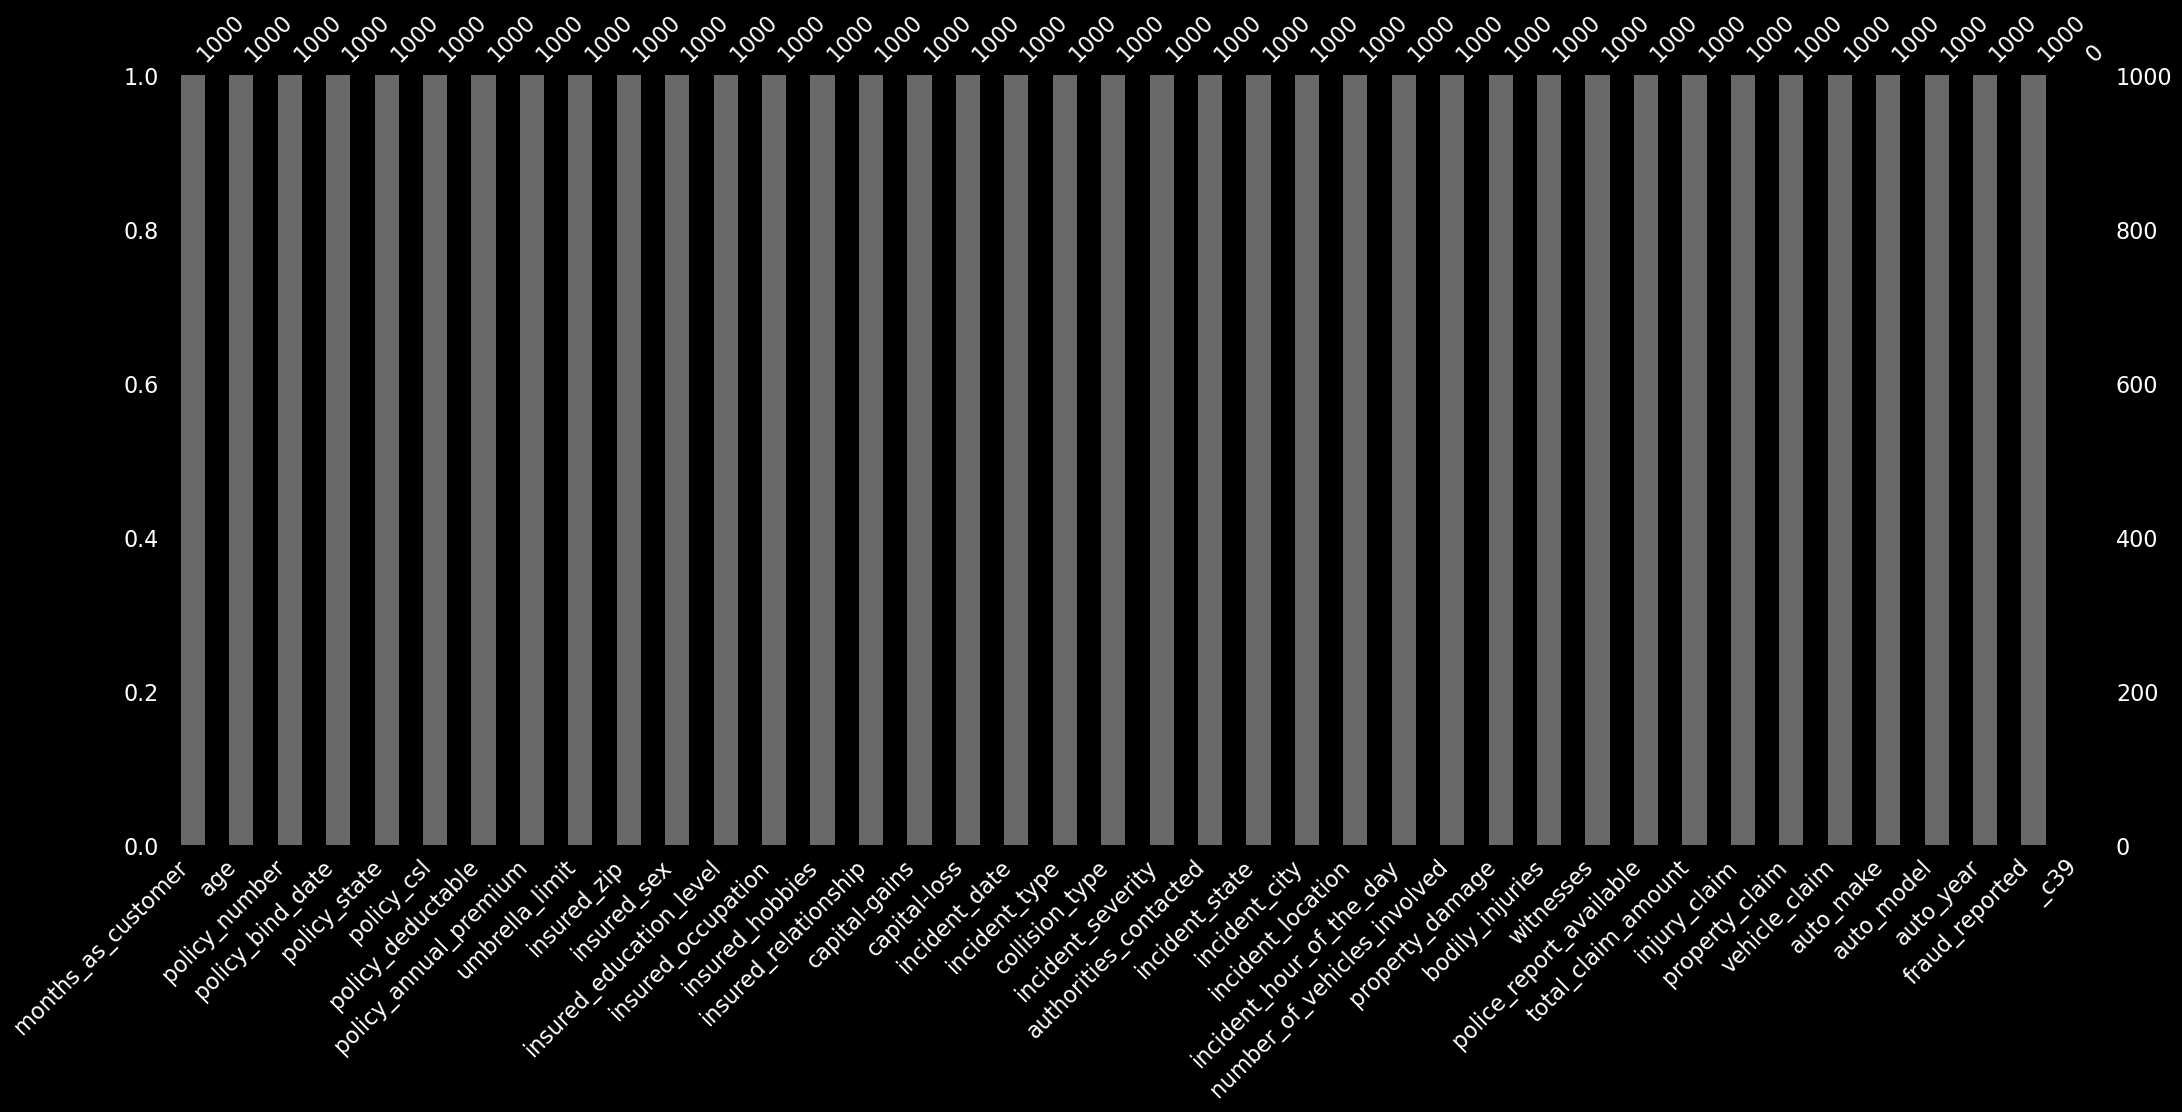

In [8]:
import missingno as msno

msno.bar(df)
plt.show()

In [9]:
df.drop('_c39',axis=1,inplace=True)

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Handling Special Character

In [11]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
df=df.replace('?',np.nan)

In [13]:
columns_with_nan=['collision_type','property_damage','police_report_available']

In [14]:
for col in columns_with_nan:
 df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Checking Unique Value

In [16]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Dropping Unwanted columns

<AxesSubplot:>

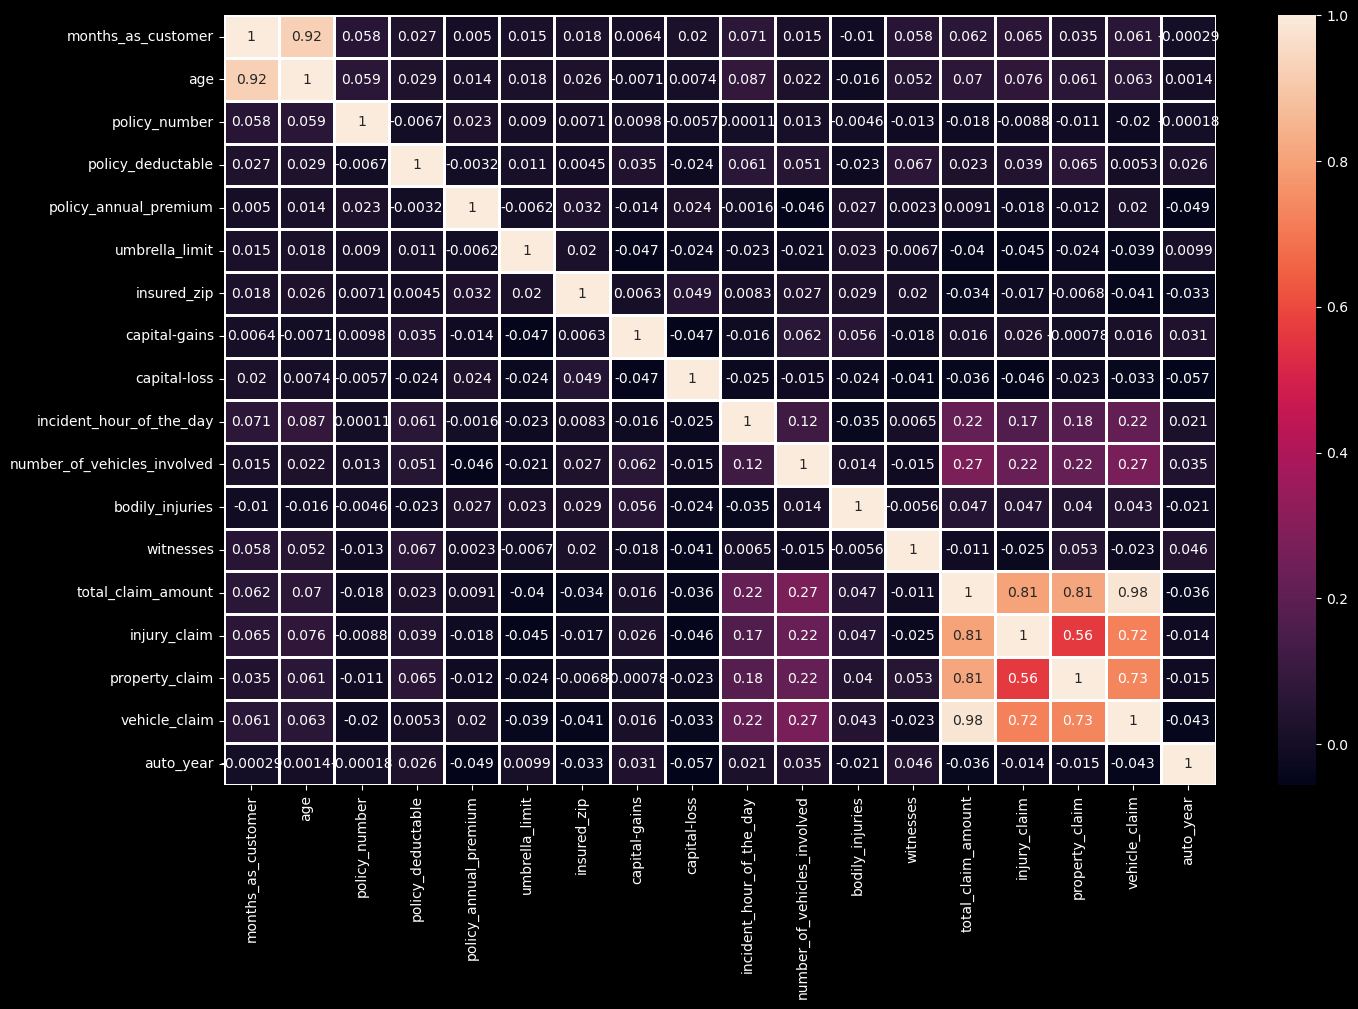

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True, fmt = '.2g', linewidth = 1)

In [18]:
df.drop(['policy_number','insured_zip','incident_location',
         'auto_make','auto_model','auto_year','policy_bind_date','insured_hobbies','incident_location'],axis=1,inplace=True)

In [19]:
df.shape

(1000, 31)

In [20]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

# Exploratory Data Analysis

<AxesSubplot:ylabel='fraud_reported'>

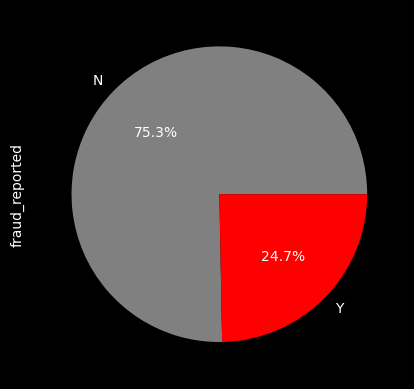

In [21]:
df['fraud_reported'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['grey','red'])

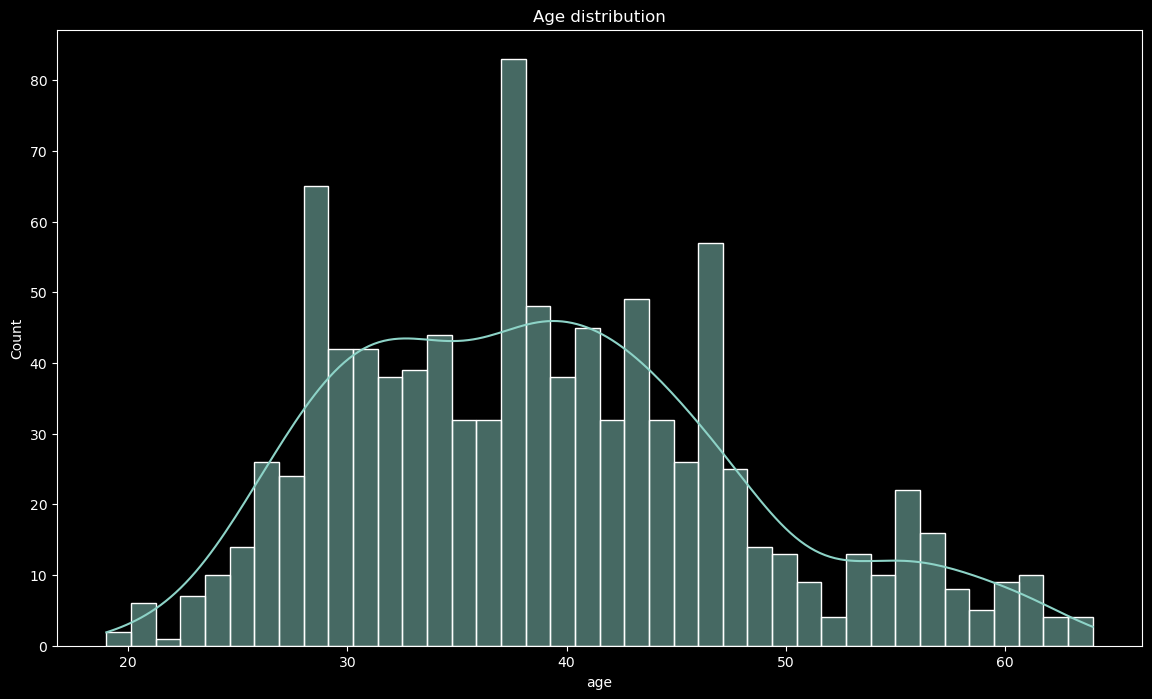

In [22]:
plt.figure(figsize = (14, 8))
sns.histplot(x = df['age'],kde=True, bins = 40)    #, bins = 'fd')
plt.title('Age distribution')
plt.show()

Text(0.5, 1.0, 'Impact Of Age On fraud_reported ')

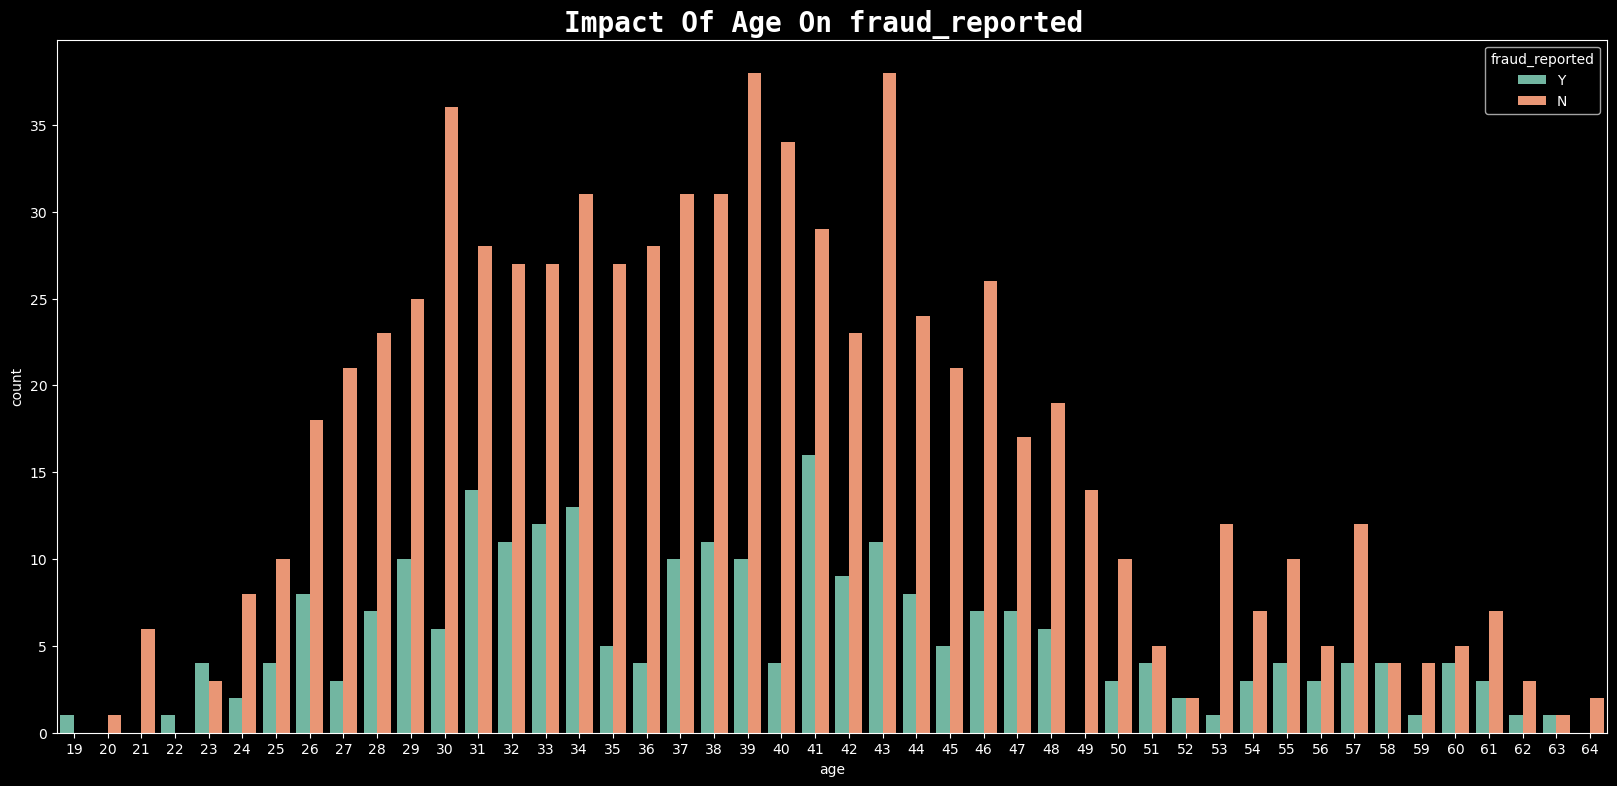

In [23]:
plt.figure(figsize=(20, 9))
sns.countplot(df['age'], hue=df['fraud_reported'],palette="Set2")
plt.title('Impact Of Age On fraud_reported ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

Text(0.5, 1.0, 'Impact of Policy State On fraud_reported ')

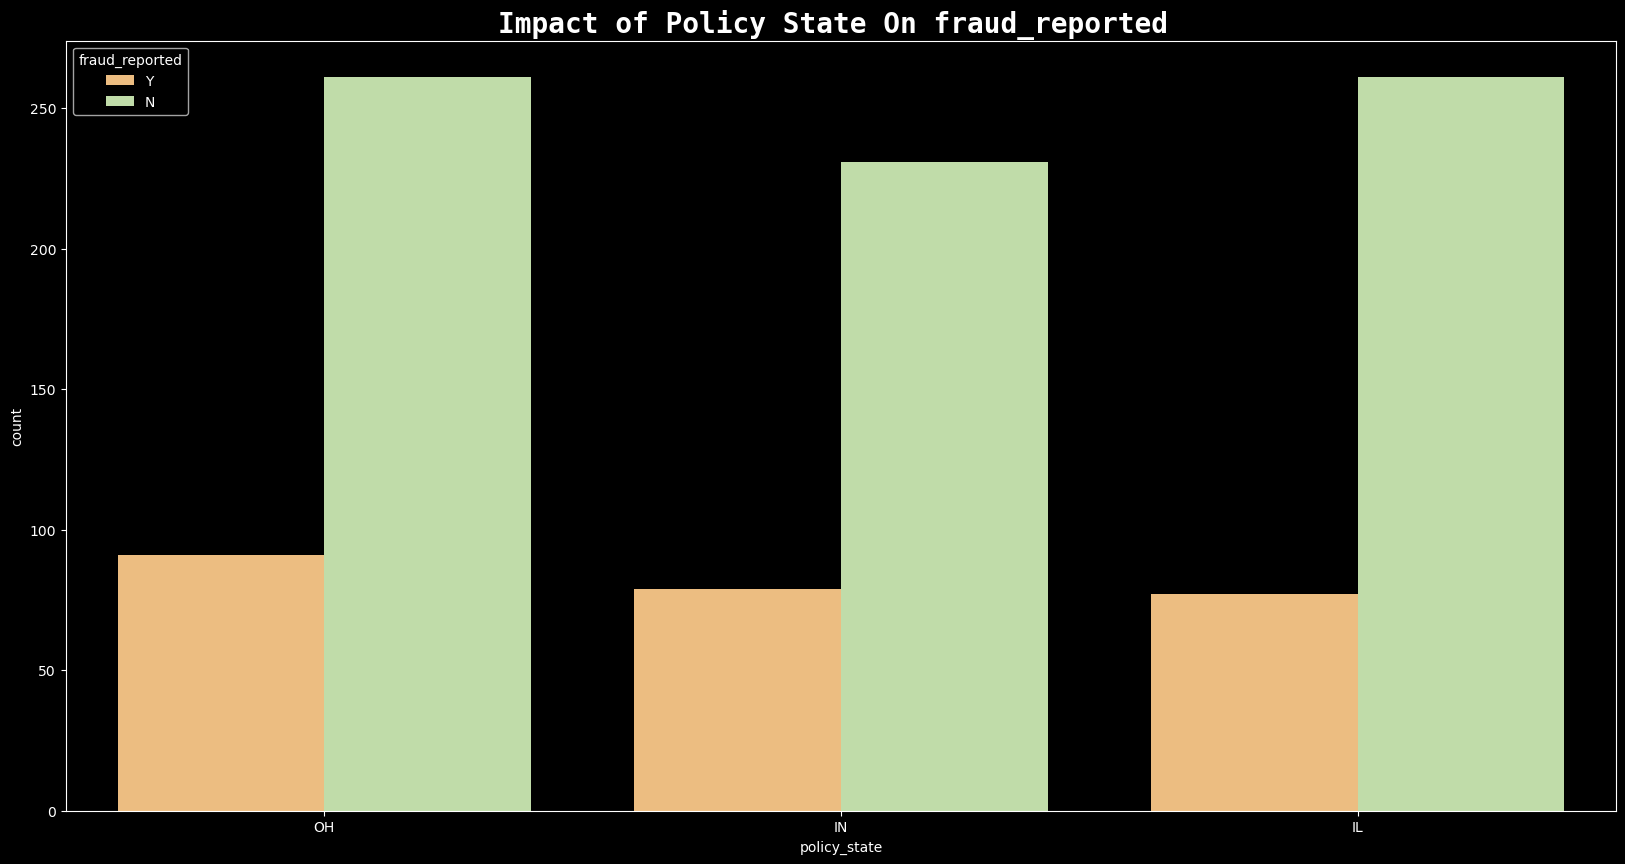

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(df['policy_state'], hue=df['fraud_reported'],palette="Spectral")
plt.title('Impact of Policy State On fraud_reported ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

In [25]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

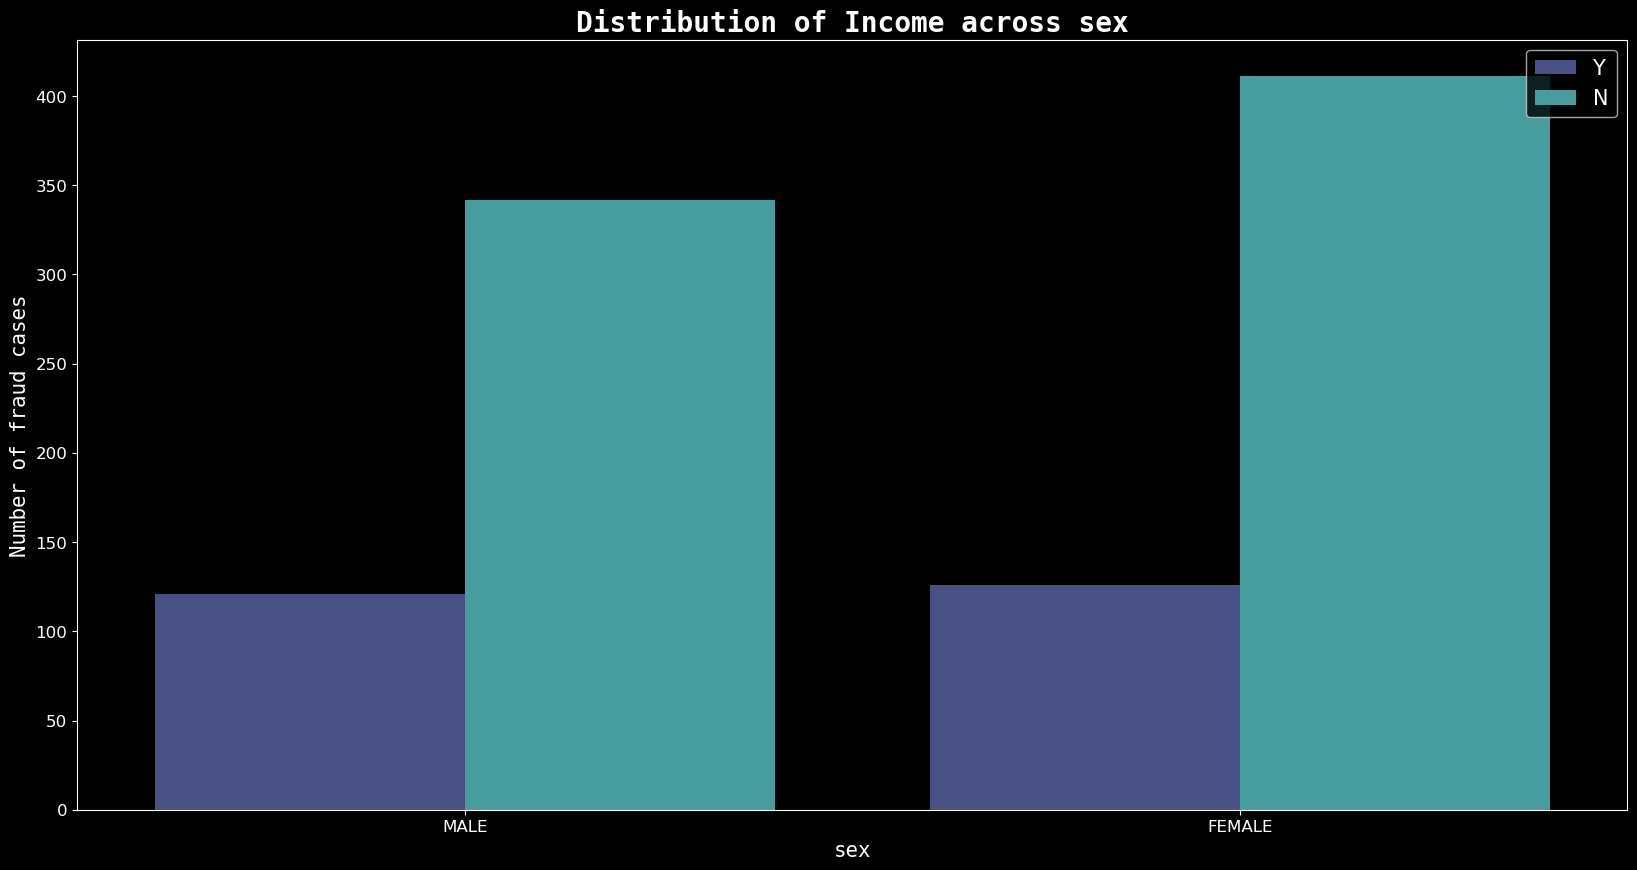

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(df['insured_sex'],
              hue=df['fraud_reported'],palette='mako')
plt.title('Distribution of Income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of fraud cases', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

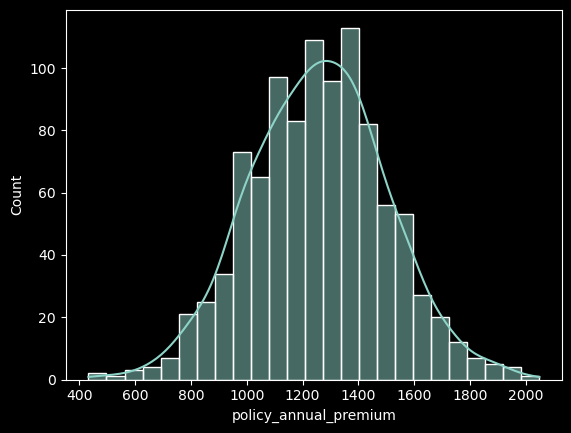

In [27]:
sns.histplot(df['policy_annual_premium'],kde=True)

In [28]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

Text(0.5, 1.0, 'Witness And Police Report Available When Fraid Reported')

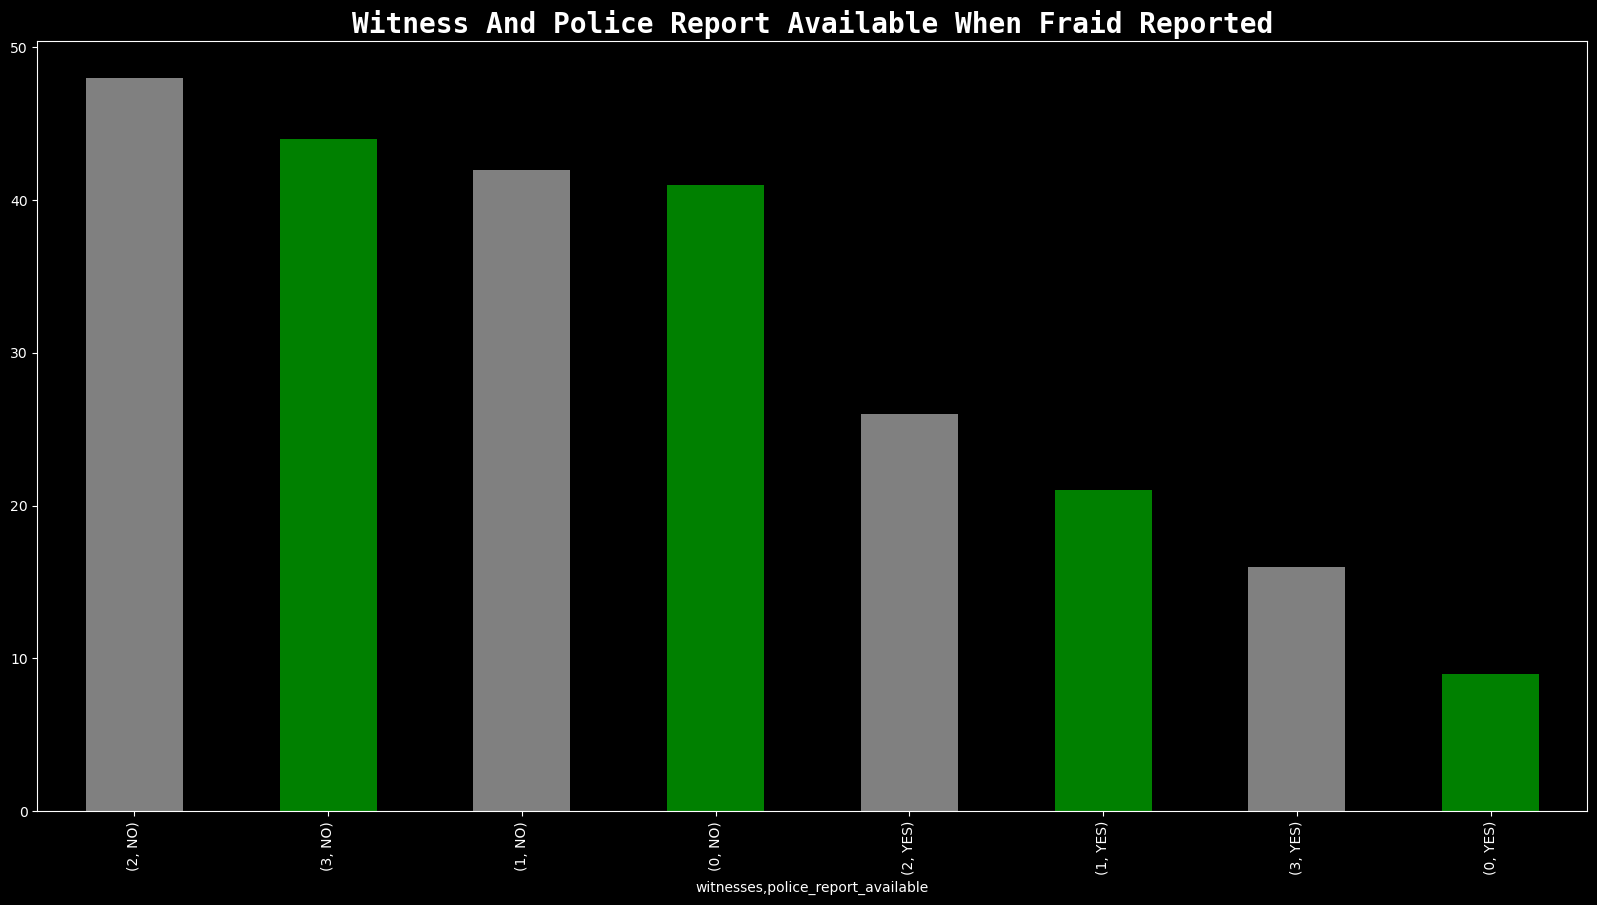

In [41]:
plt.figure(figsize=(20, 10))
df1=df[df["fraud_reported"]=="Y"]
df1.groupby(['witnesses'])["police_report_available"].value_counts().sort_values(ascending=False).plot(kind='bar',color=['grey','g'])
plt.title('Witness And Police Report Available When Fraid Reported', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

In [30]:
df1.sample()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
247,269,44,OH,100/300,500,1297.75,4000000,FEMALE,JD,other-service,...,3,NO,0,1,NO,98670,15180,15180,68310,Y


# Total claim amount when fraud reported

In [31]:
df1['total_claim_amount'].sum()

14894620

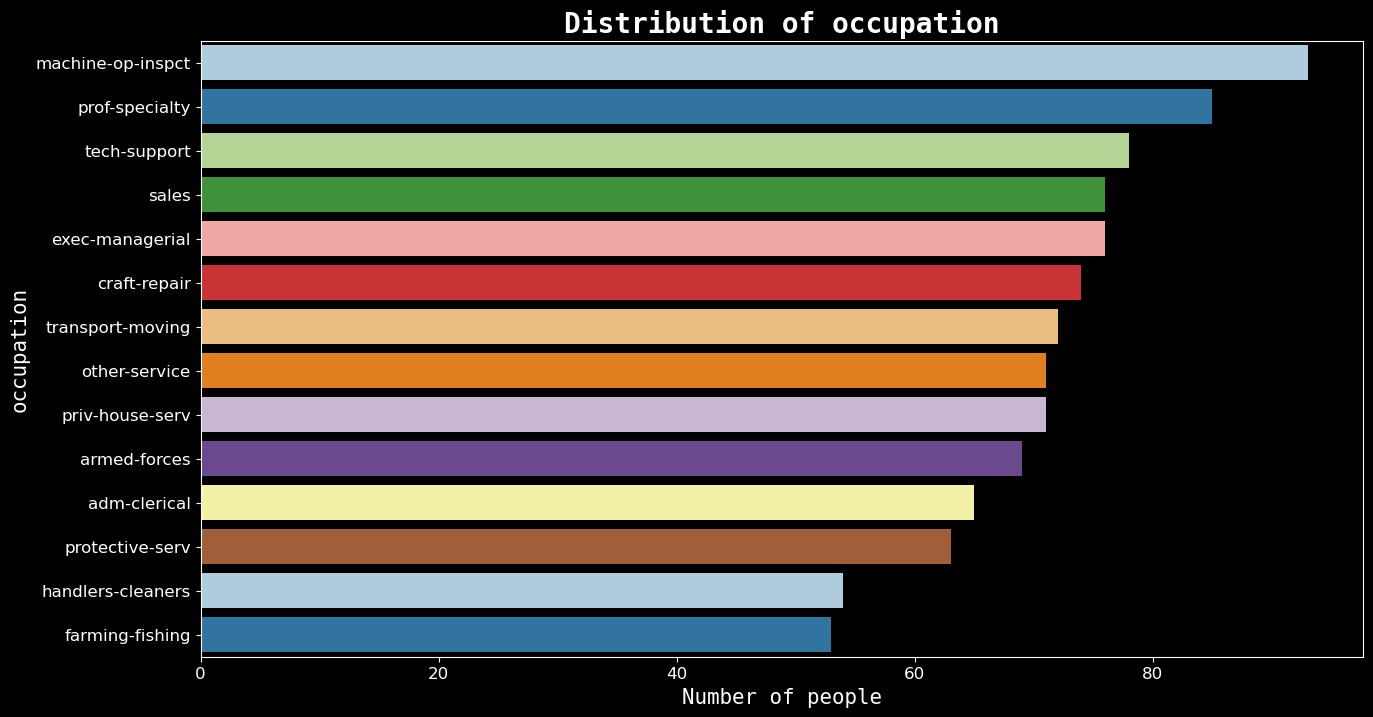

In [63]:
plt.figure(figsize=(15, 8))
occupation=df['insured_occupation'].value_counts()
sns.barplot(occupation.values, occupation.index, palette='Paired')
plt.title('Distribution of occupation', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('occupation', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

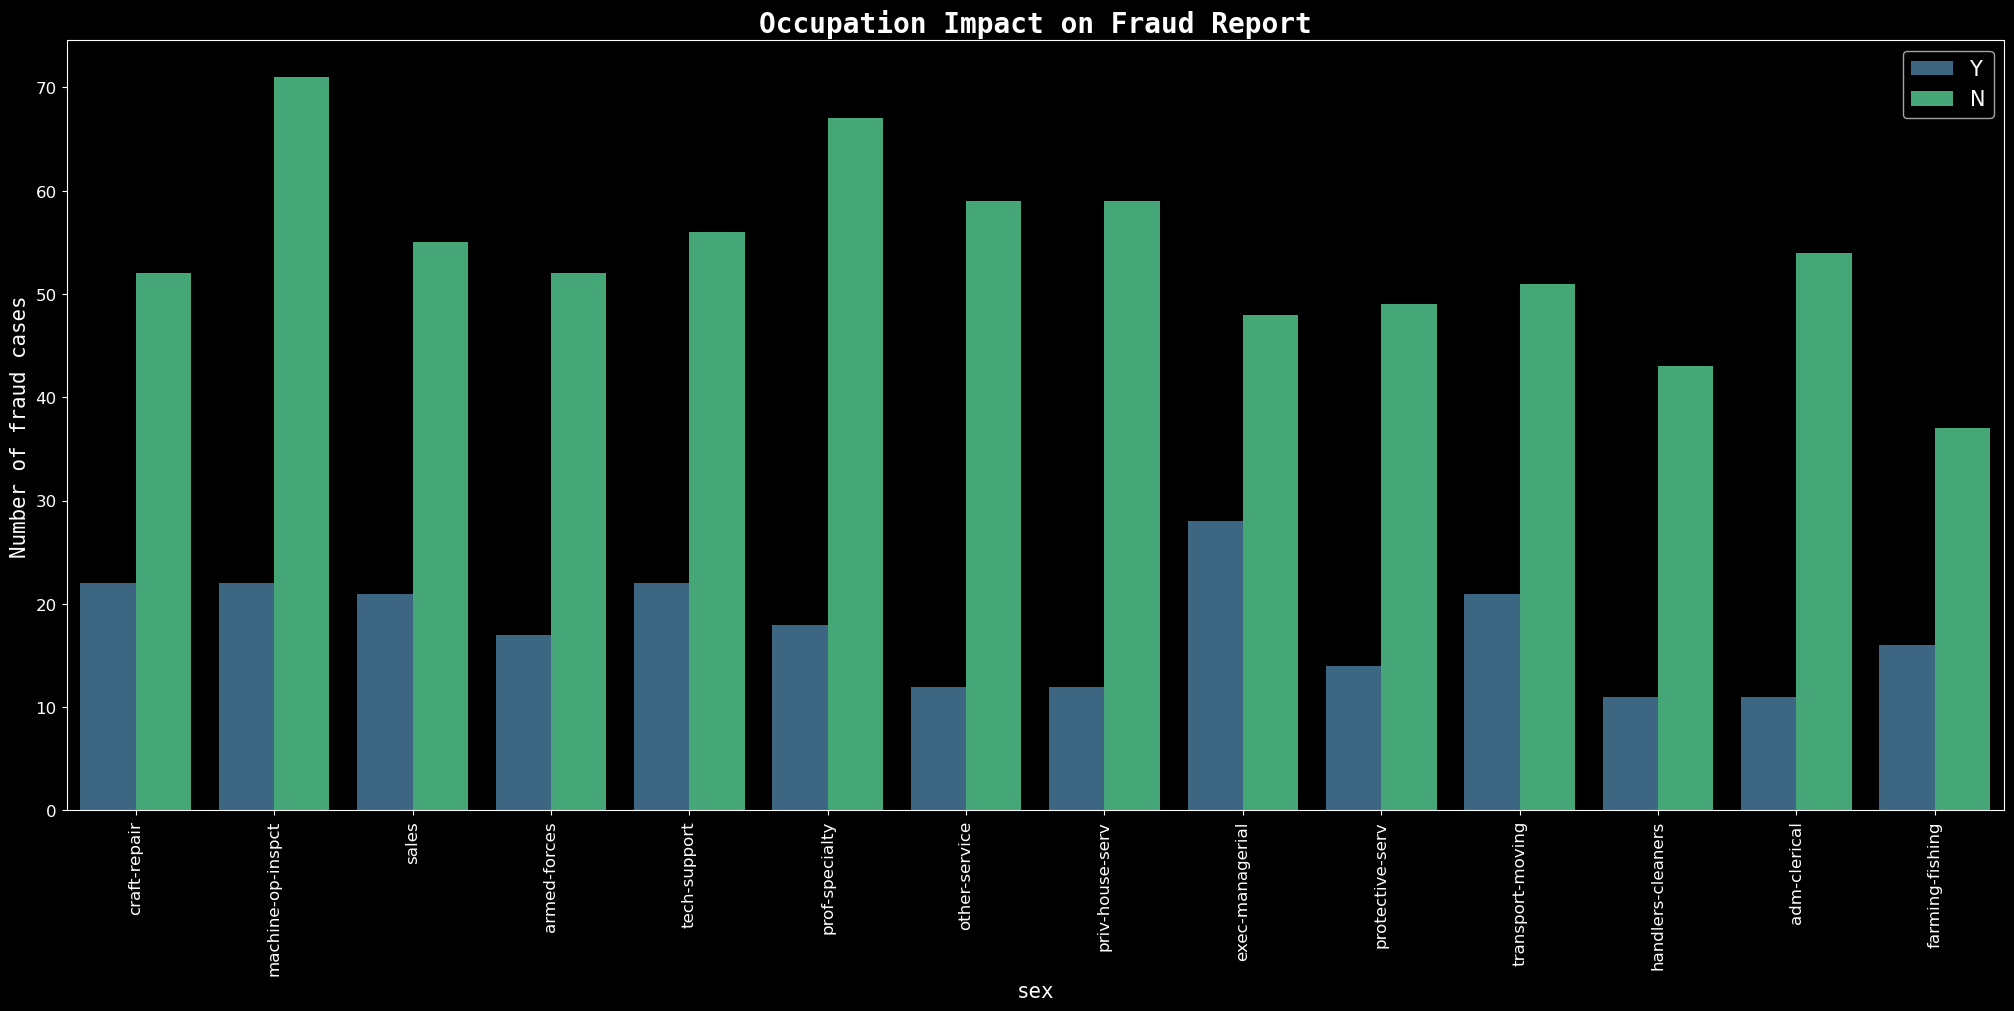

In [59]:
plt.figure(figsize=(25, 10))
sns.countplot(df['insured_occupation'],
              hue=df['fraud_reported'],palette='viridis')
plt.title('Occupation Impact on Fraud Report', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of fraud cases', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation = 90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

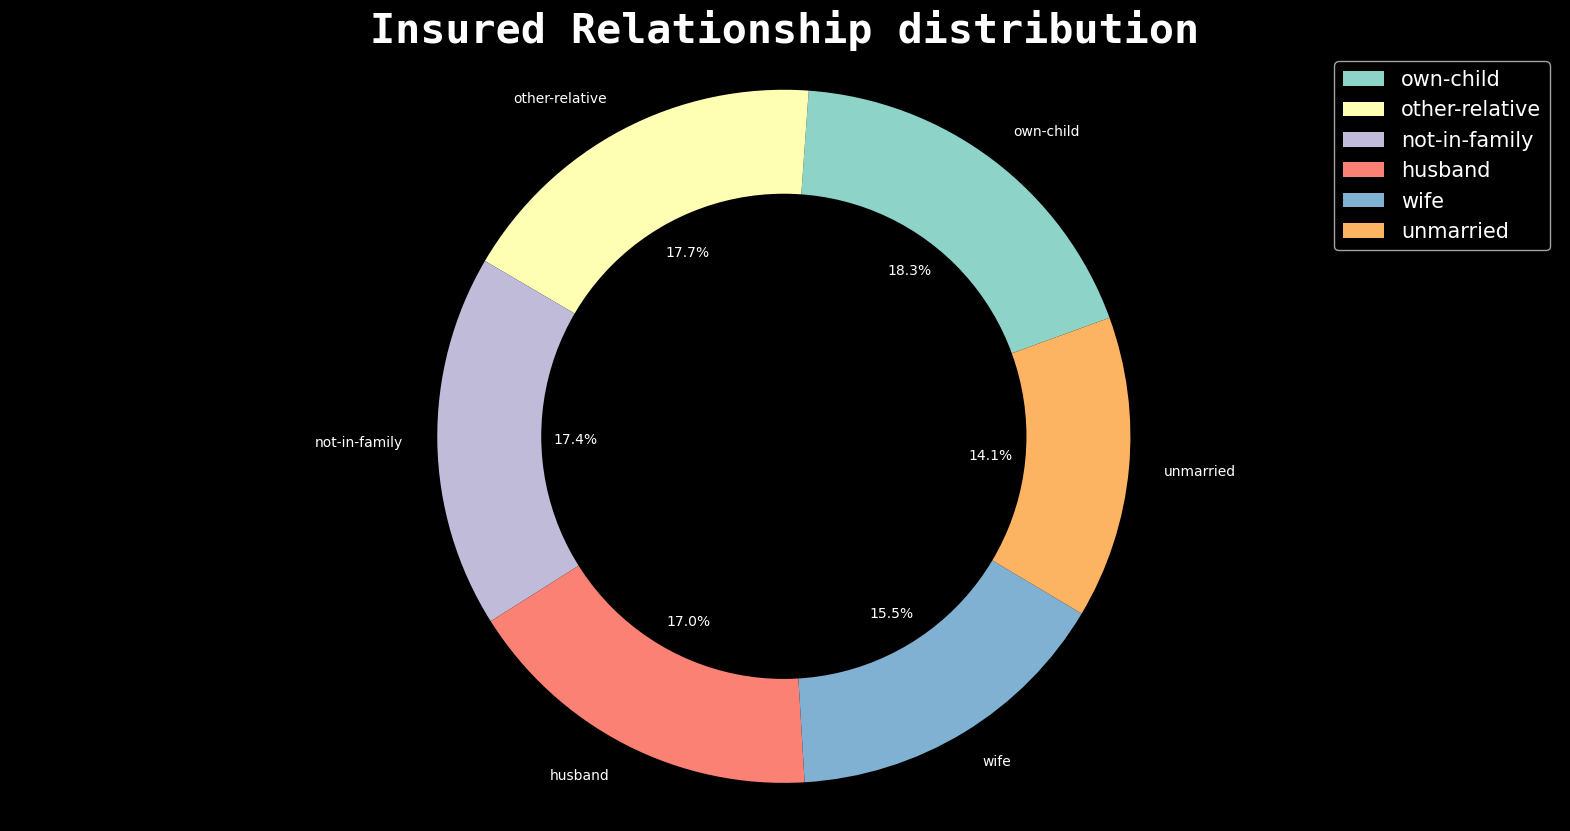

In [65]:
relation = df['insured_relationship'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=20, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Insured Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

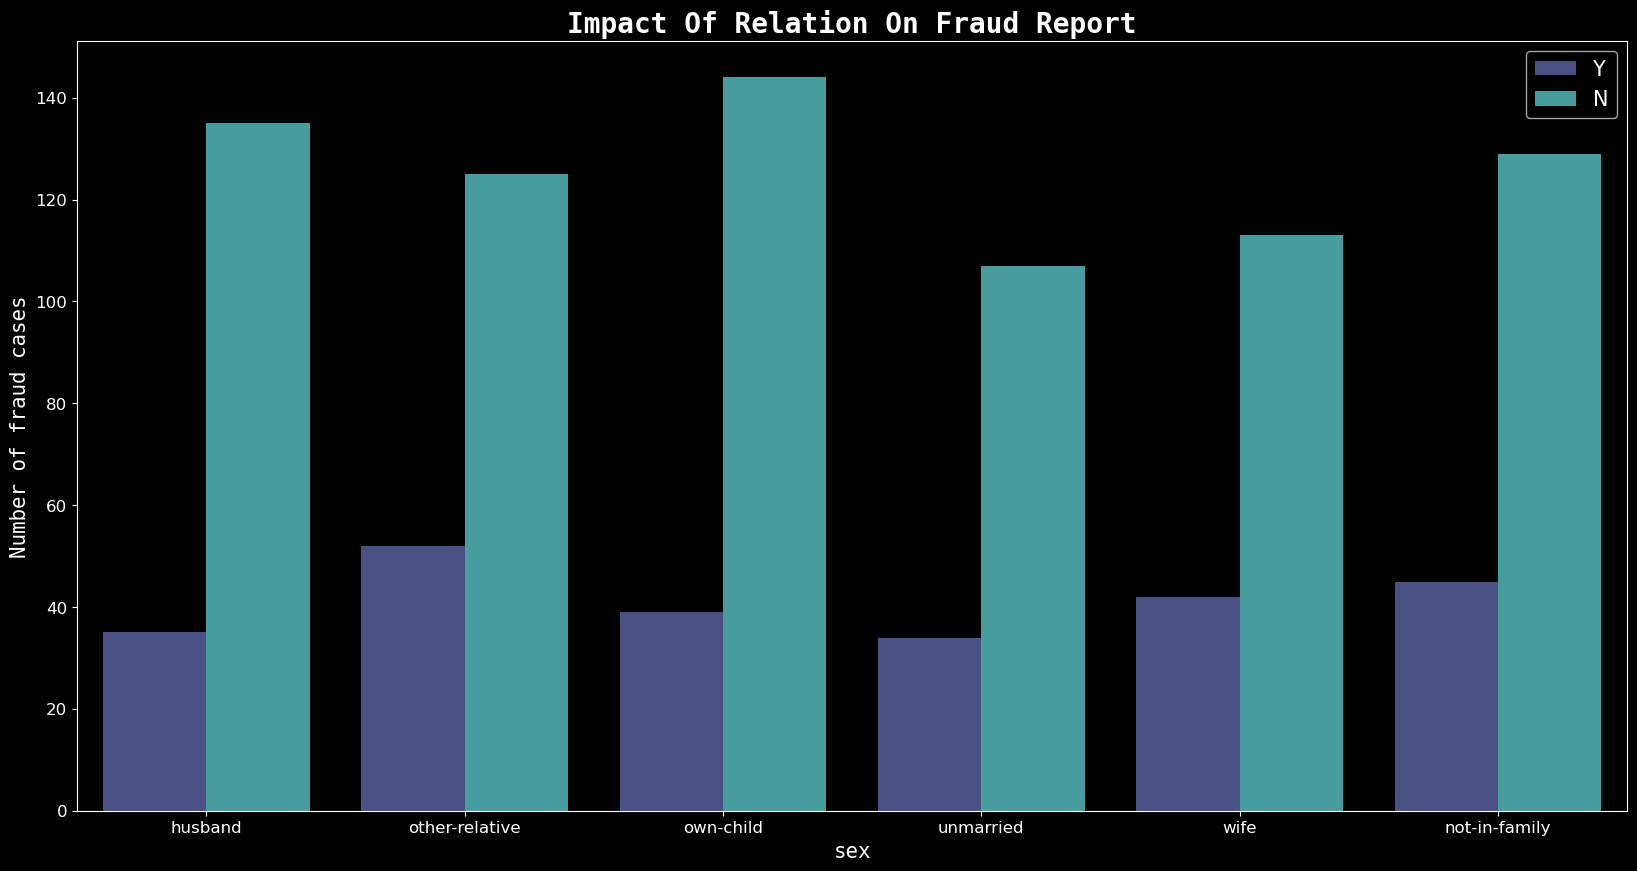

In [67]:
plt.figure(figsize=(20, 10))
sns.countplot(df['insured_relationship'],
              hue=df['fraud_reported'],palette='mako')
plt.title('Impact Of Relation On Fraud Report', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of fraud cases', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [70]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

<AxesSubplot:ylabel='incident_type'>

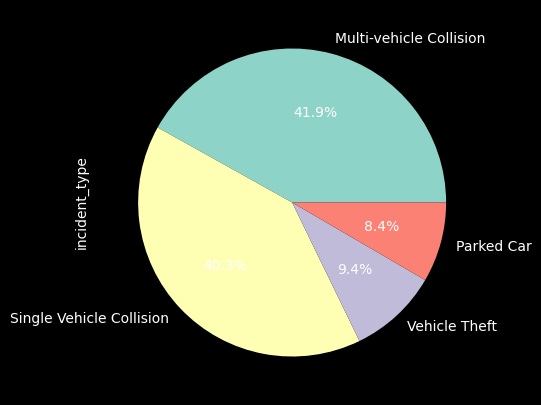

In [75]:
df['incident_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

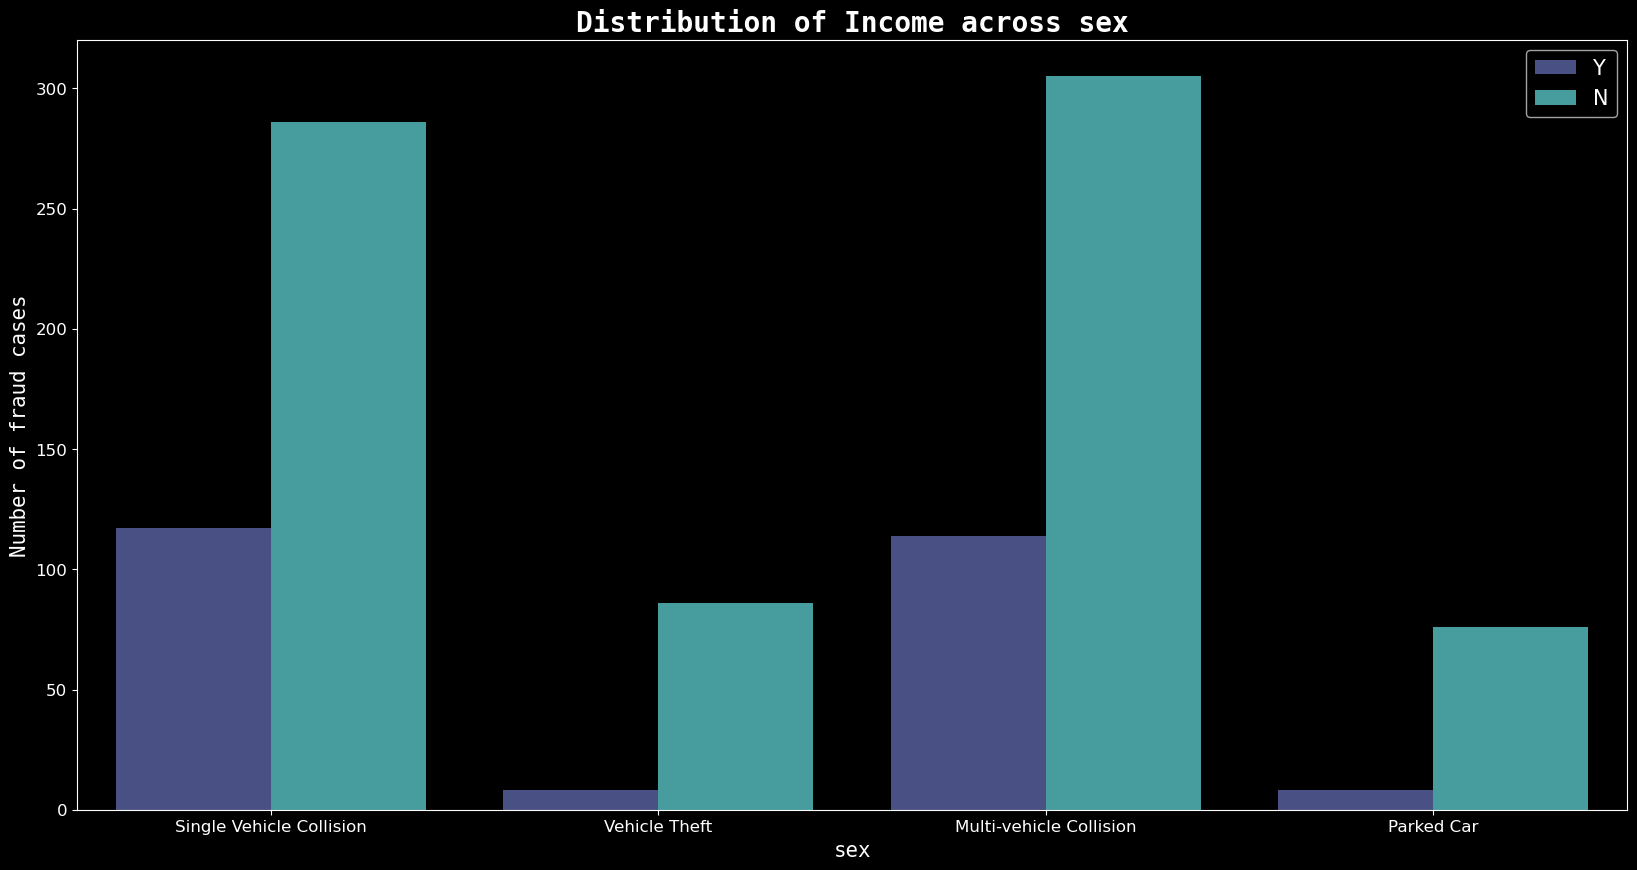

In [76]:
plt.figure(figsize=(20, 10))
sns.countplot(df['incident_type'],
              hue=df['fraud_reported'],palette='mako')
plt.title('Distribution of Income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of fraud cases', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

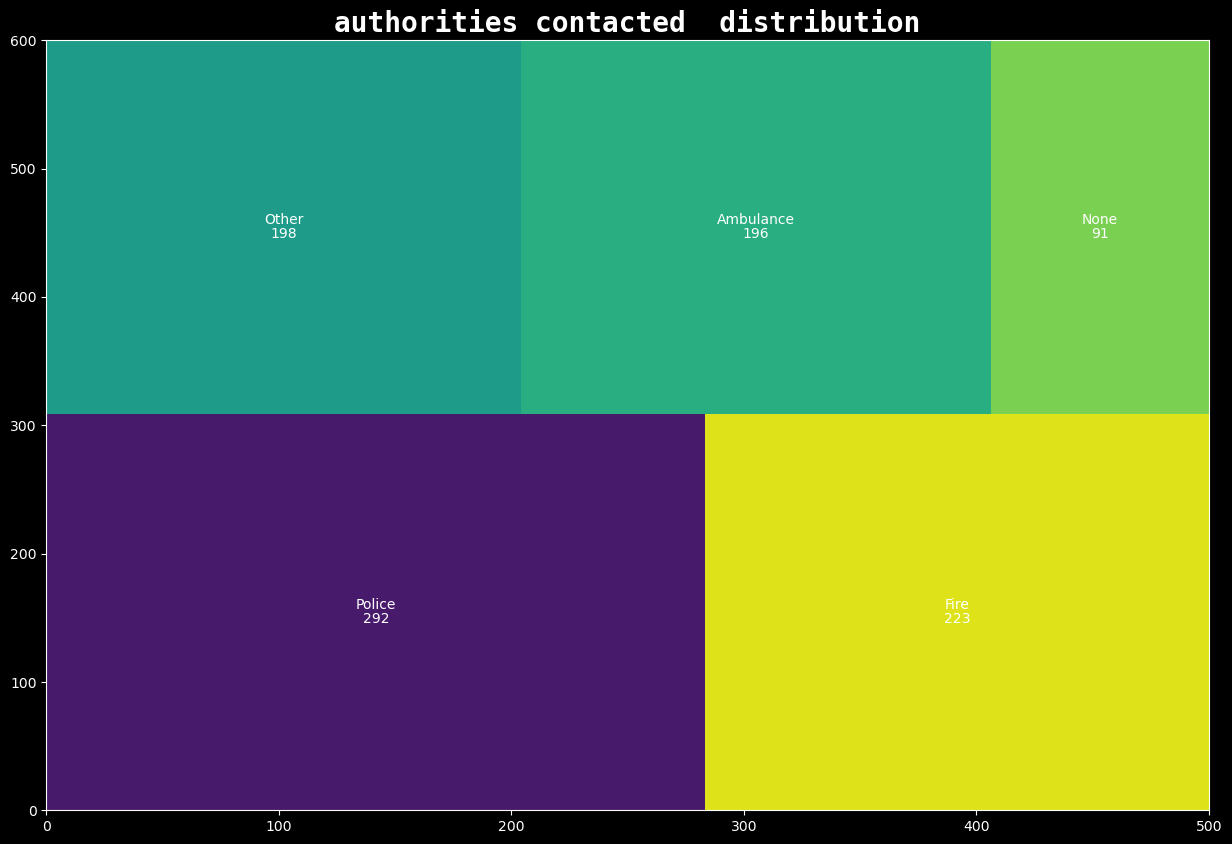

In [79]:
import squarify
race = df['authorities_contacted'].value_counts()
plt.figure(figsize=(15, 10))
squarify.plot(sizes=race.values, label=race.index, value=race.values, norm_x=500,norm_y=600)
plt.title('authorities contacted  distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

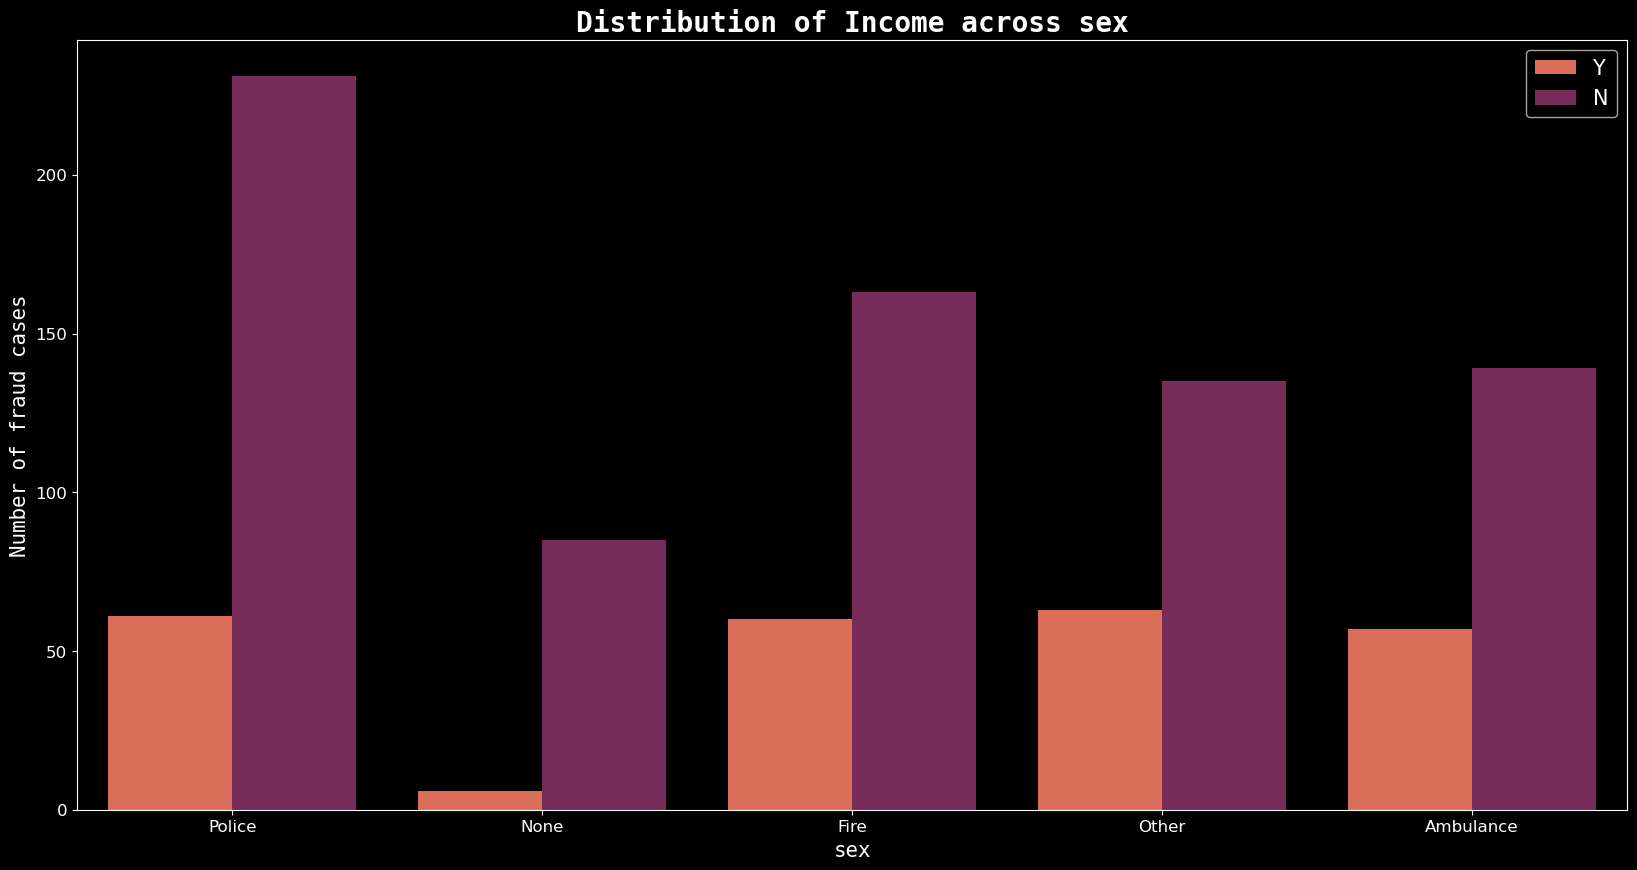

In [81]:
plt.figure(figsize=(20, 10))
sns.countplot(df['authorities_contacted'],
              hue=df['fraud_reported'],palette='rocket_r')
plt.title('Distribution of Income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of fraud cases', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

<AxesSubplot:>

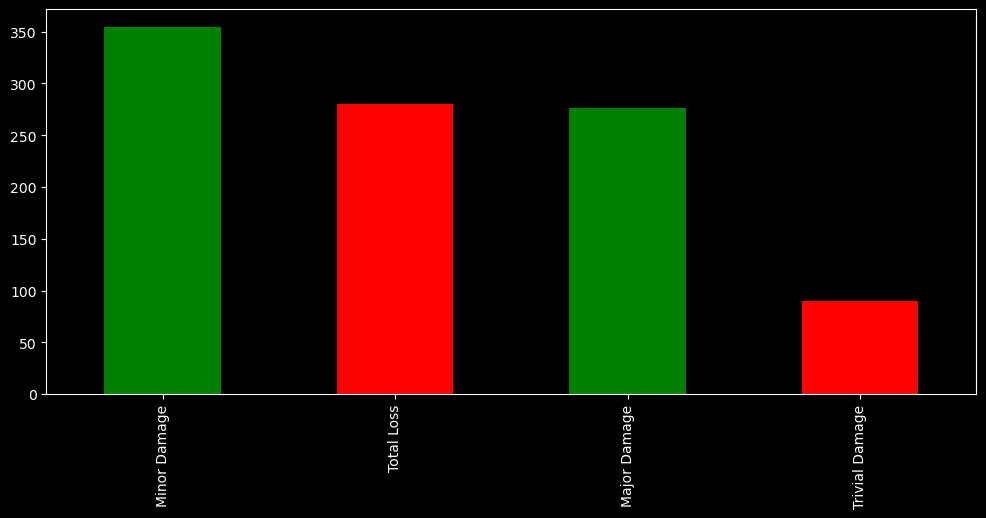

In [84]:
df['incident_severity'].value_counts().plot(kind='bar',color=['g','r'])

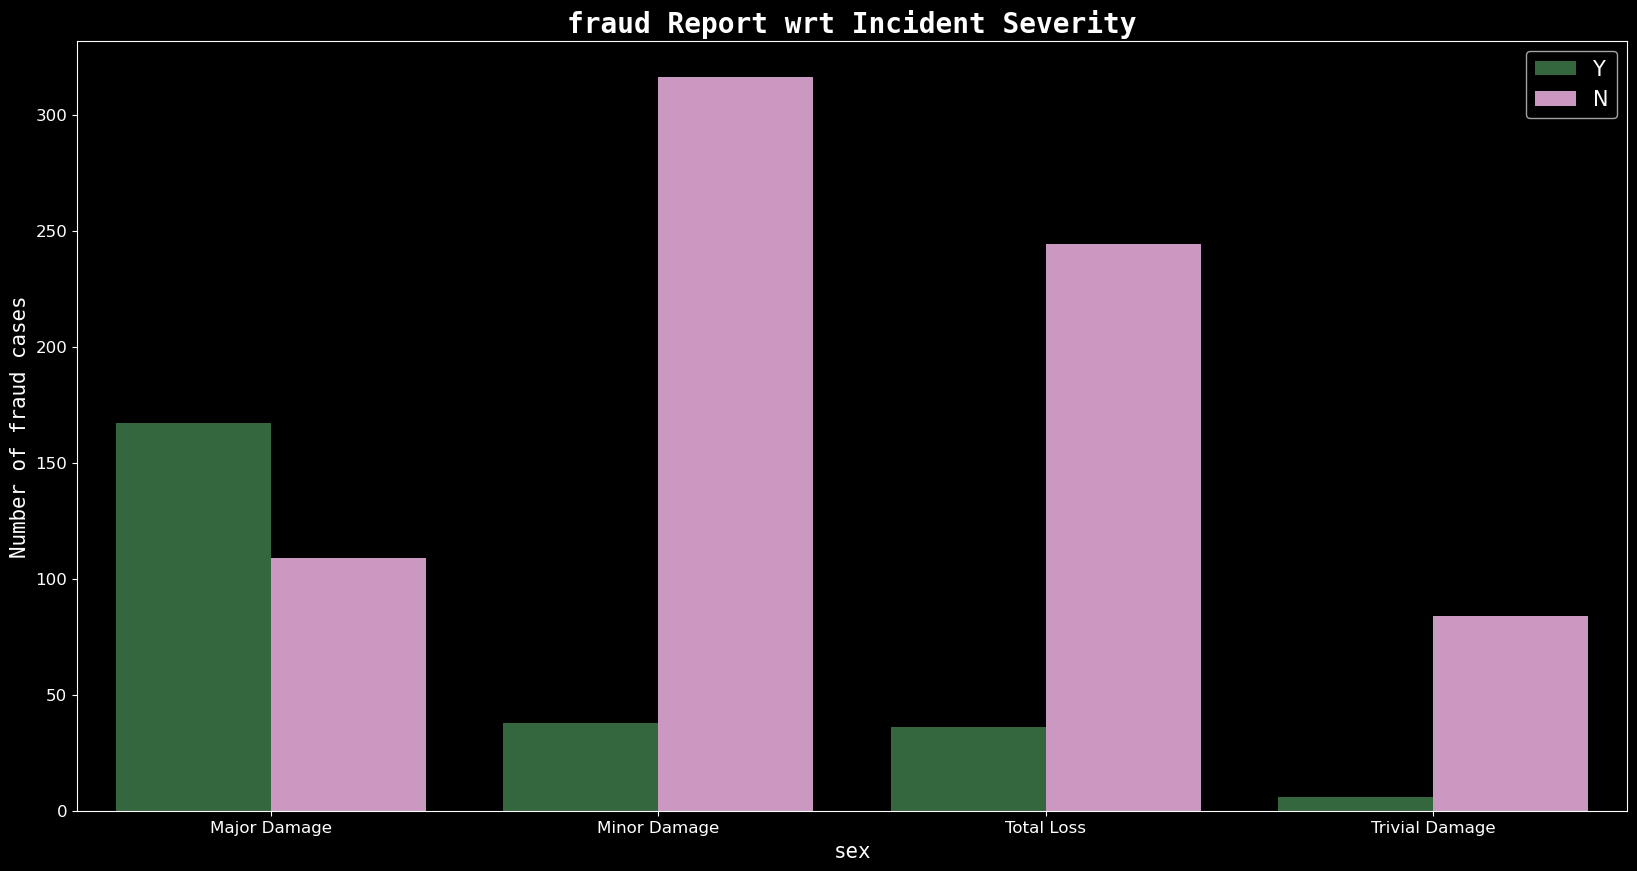

In [87]:
plt.figure(figsize=(20, 10))
sns.countplot(df['incident_severity'],
              hue=df['fraud_reported'],palette='cubehelix')
plt.title('fraud Report wrt Incident Severity', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of fraud cases', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

<AxesSubplot:xlabel='fraud_reported,bodily_injuries'>

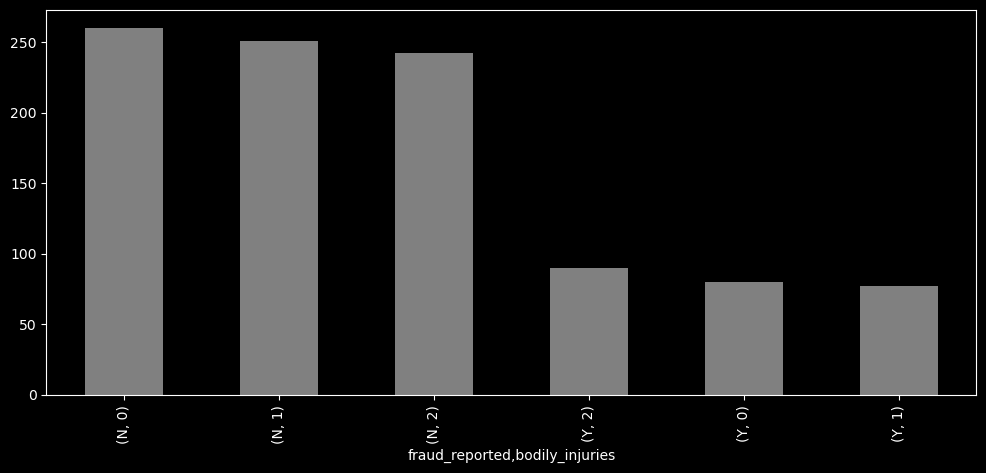

In [93]:
df.groupby('fraud_reported')['bodily_injuries'].value_counts().plot(kind='bar',color=['gray'])

### 2.3: Multivariate Analysis

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

## Step 3: Data Preprocessing

### 3.2: Label Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

### 3.3: Feature Selection

In [99]:
X = df.drop('fraud_reported', axis=1)
Y = df['fraud_reported']

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [101]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [102]:
feature_imp = selector.feature_importances_

In [103]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 3.3
1 3.2
2 2.69
3 2.77
4 2.66
5 3.22
6 2.27
7 1.92
8 2.83
9 3.62
10 2.89
11 2.59
12 2.66
13 3.55
14 1.67
15 2.28
16 18.2
17 2.8
18 3.12
19 3.01
20 3.01
21 1.91
22 1.93
23 2.66
24 2.86
25 1.86
26 3.57
27 3.44
28 3.64
29 3.86


In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int64  
 3   policy_csl                   1000 non-null   int64  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   int64  
 8   insured_education_level      1000 non-null   int64  
 9   insured_occupation           1000 non-null   int64  
 10  insured_relationship         1000 non-null   int64  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_date      

In [105]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,...,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,...,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,...,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,...,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,...,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,...,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,...,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,...,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,...,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,...,-0.015368,-0.016378,-0.000236,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.001564


In [108]:
X = X.drop(['umbrella_limit', 'policy_csl', 'incident_hour_of_the_day', 'incident_state',
            'capital-gains', 'capital-loss','policy_annual_premium'], axis=1)

### 3.4: Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [111]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.3 %
1    24.7 %
Name: fraud_reported, dtype: object

In [112]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [113]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [114]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [115]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: fraud_reported, dtype: object

### 3.6: Creating a train test split

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [117]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1204, 23)
X_test shape: (302, 23)
Y_train shape: (1204,)
Y_test shape: (302,)


## Step 4: Data Modelling

### 4.1: Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [119]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [120]:
Y_pred_log_reg = log_reg.predict(X_test)

### 4.2: KNN Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [122]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [123]:
Y_pred_knn = knn.predict(X_test)

### 4.3: Support Vector Classifier

In [124]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [125]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [126]:
Y_pred_svc = svc.predict(X_test)

### 4.4: Naive Bayes Classifier

In [127]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [128]:
nb.fit(X_train, Y_train)

GaussianNB()

In [129]:
Y_pred_nb = nb.predict(X_test)

### 4.5: Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [131]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### 4.6: Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [134]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [135]:
Y_pred_ran_for = ran_for.predict(X_test)

### 4.7: XGB Classifier

In [136]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [137]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [138]:
Y_pred_xgb = xgb.predict(X_test)

## Step 5: Model Evaluation

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [140]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 73.51
F1 score: 74.84


In [141]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 74.83
F1 score: 77.65


In [142]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 83.11
F1 score: 84.4


In [143]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 66.89
F1 score: 71.91


In [144]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 86.09
F1 score: 87.86


In [145]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 91.06
F1 score: 91.89


In [146]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 89.4
F1 score: 90.42


## Step 6: Hyperparameter Tuning

In [154]:
from sklearn.model_selection import RandomizedSearchCV

In [155]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [156]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [157]:
rf_tuned = RandomForestClassifier(random_state=42)

In [158]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [159]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [160]:
rf_cv.best_score_

0.9111549100968188

In [161]:
rf_cv.best_params_

{'n_estimators': 110, 'max_depth': 40}

In [162]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [163]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [164]:
Y_pred_rf_best = rf_best.predict(X_test)

In [165]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 91.06
F1 score: 91.94


In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

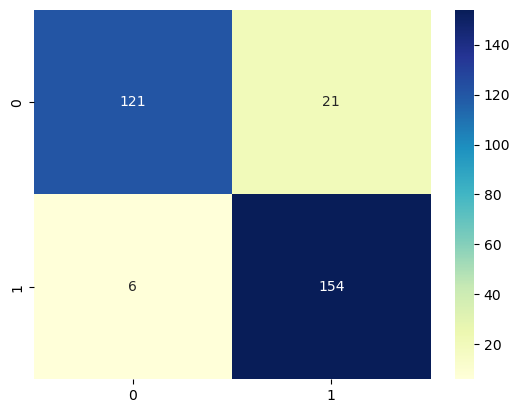

In [167]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [168]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       142
           1       0.88      0.96      0.92       160

    accuracy                           0.91       302
   macro avg       0.92      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302

